In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# 加载鸢尾花数据集
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df['label'] = iris.target
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# 加载鸢尾花数据集
x = iris.data
y = iris.target

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)


In [4]:
class Model:
    def __init__(self, K=5):
        self.K = K

    # 计算新输入点与实例的距离
    def distance(self, data, x):
        # 将实例的特征砖矩阵
        x = np.mat(x)
        
        # 欧式距离
        d = np.sqrt(np.sum(np.square(data - x), axis = 1))
        
        num = len(data)
        arr = np.array(d).reshape(num)
        return arr
    
    # 获取距离最近的K个点的index
    def closestK(self, distance):
        # np.argsort 返回从小到大排列的元素的index， 比如np.argsort[1,3,2]得到的是[0,2,1]
        sort = np.argsort(distance)
        
        k_index = sort[:self.K]
        return k_index
    
    # 多数表决
    def classN(self, label, k_index):
        # 类别的个数
        num = len(np.unique(np.array(label)))
        record = np.zeros(num)

        for index in k_index:
            record[np.array(label)[index]] += 1
            
        class_n = list(record).index(max(record))        
        return class_n
        
    
    def fit(self, train_data, train_label):
        self.train_data = train_data
        self.train_label = train_label
        
    def predict(self, test_data):
        self.test_data = test_data
        start = time.time()

        # 得到测试集的记录的个数
        testNum = len(self.test_data)

        types = np.zeros(testNum)

        # 遍历每一个新输入实例
        for i in range(testNum):
            print('classifying %d' % i)
            dArr = self.distance(self.train_data, self.test_data[i])

            # 得到距离新输入实例距离最短的K个点的index
            sampleK_index = self.closestK(dArr)

            # 得到新输入实例的分类
            types[i] = self.classN(self.train_label, sampleK_index)

        end = time.time()
        print('Classifying time: ', end - start)
        return types
        

In [5]:
knn = Model(K=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# 预测结果展示
labels = ["山鸢尾","虹膜锦葵","变色鸢尾"]
for i in range(len(y_pred)):
    label1 = labels[y_pred[i].astype(int)]
    label2 = labels[y_test[i].astype(int)]
    print("第%d次测试:\t预测值:%s\t\t真实值:%s"%((i+1),label1,label2))

# 计算准确率
accuracy = accuracy_score(y_test, y_pred) # accuracy_score()函数会比较真实标签值和预测标签值，并计算出准确分类的样本数占总样本数的比例，即准确率。
print("准确率:", accuracy)

classifying 0
classifying 1
classifying 2
classifying 3
classifying 4
classifying 5
classifying 6
classifying 7
classifying 8
classifying 9
classifying 10
classifying 11
classifying 12
classifying 13
classifying 14
classifying 15
classifying 16
classifying 17
classifying 18
classifying 19
classifying 20
classifying 21
classifying 22
classifying 23
classifying 24
classifying 25
classifying 26
classifying 27
classifying 28
classifying 29
classifying 30
classifying 31
classifying 32
classifying 33
classifying 34
classifying 35
classifying 36
classifying 37
classifying 38
classifying 39
classifying 40
classifying 41
classifying 42
classifying 43
classifying 44
Classifying time:  0.0
第1次测试:	预测值:变色鸢尾		真实值:变色鸢尾
第2次测试:	预测值:山鸢尾		真实值:山鸢尾
第3次测试:	预测值:变色鸢尾		真实值:变色鸢尾
第4次测试:	预测值:山鸢尾		真实值:山鸢尾
第5次测试:	预测值:变色鸢尾		真实值:变色鸢尾
第6次测试:	预测值:变色鸢尾		真实值:变色鸢尾
第7次测试:	预测值:山鸢尾		真实值:山鸢尾
第8次测试:	预测值:山鸢尾		真实值:山鸢尾
第9次测试:	预测值:变色鸢尾		真实值:变色鸢尾
第10次测试:	预测值:山鸢尾		真实值:山鸢尾
第11次测试:	预测值:山鸢尾		真实值:山鸢尾
第12次测试:	预测值:变色鸢尾		真实值:变色鸢尾
第13次测试:	预

classifying 0
classifying 1
classifying 2
classifying 3
classifying 4
classifying 5
classifying 6
classifying 7
classifying 8
classifying 9
classifying 10
classifying 11
classifying 12
classifying 13
classifying 14
classifying 15
classifying 16
classifying 17
classifying 18
classifying 19
classifying 20
classifying 21
classifying 22
classifying 23
classifying 24
classifying 25
classifying 26
classifying 27
classifying 28
classifying 29
classifying 30
classifying 31
classifying 32
classifying 33
classifying 34
classifying 35
classifying 36
classifying 37
classifying 38
classifying 39
classifying 40
classifying 41
classifying 42
classifying 43
classifying 44
Classifying time:  0.0
classifying 0
classifying 1
classifying 2
classifying 3
classifying 4
classifying 5
classifying 6
classifying 7
classifying 8
classifying 9
classifying 10
classifying 11
classifying 12
classifying 13
classifying 14
classifying 15
classifying 16
classifying 17
classifying 18
classifying 19
classifying 20
classif

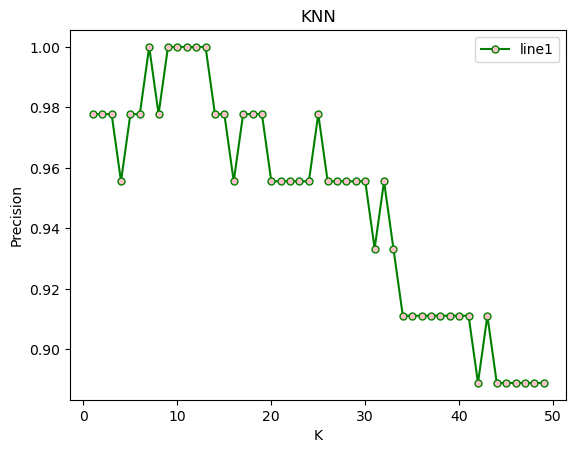

In [6]:
precision = []
k1 = range(1,50)
for k in k1:
    knn = Model(K=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    precision.append(accuracy)

plt.plot(k1,precision,label='line1',color='g',marker='.',markerfacecolor='pink',markersize=10)
plt.xlabel('K')
plt.ylabel('Precision')
plt.title('KNN')
plt.legend()
plt.show()